### Imports

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # Useful tool to arrange multiple plots in one figure (https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html)
%matplotlib inline

import torch # to determine if we can do away with it
import seaborn as sns

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Data

In [2]:
# download/ load the data set
output_dir = "/src/swdb_2023/Day5/data"

# this path determines where downloaded data will be stored
manifest_path = os.path.join(output_dir, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

print(cache.get_all_session_types())

['brain_observatory_1.1', 'functional_connectivity']


### Only interested in brain observatory data

TODO: check/ switch to functional connectivity dataset as Koosha suggested

In [3]:
sessions = cache.get_session_table()
brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]
brain_observatory_type_sessions.tail()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
773418906,2019-10-03T00:00:00Z,757329624,brain_observatory_1.1,124.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,546,2232,6,"[PPT, NOT, SUB, ProS, CA1, VISam, nan, APN, DG..."
791319847,2019-10-03T00:00:00Z,769360779,brain_observatory_1.1,116.0,M,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,555,2229,6,"[APN, DG, CA1, VISam, nan, LP, TH, VISpm, POL,..."
797828357,2019-10-03T00:00:00Z,776061251,brain_observatory_1.1,107.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,611,2232,6,"[PPT, MB, APN, NOT, HPF, ProS, CA1, VISam, nan..."
798911424,2019-10-03T00:00:00Z,775876828,brain_observatory_1.1,110.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,825,2233,6,"[APN, TH, Eth, LP, DG, HPF, CA3, CA1, VISrl, n..."
799864342,2019-10-03T00:00:00Z,772616823,brain_observatory_1.1,129.0,M,wt/wt,604,2233,6,"[APN, POL, LP, DG, CA1, VISrl, nan, LGd, CA3, ..."


### Choose a random session, examine

In [4]:
session_id = 791319847
session = cache.get_session_data(session_id)

In [5]:
# plot number of neurons per region
session.structurewise_unit_counts

VISp     93
CA1      85
VISrl    58
VISl     56
VISam    49
VISal    43
SUB      41
CA3      33
DG       32
VISpm    17
LGv      16
LP        9
LGd       8
TH        4
ZI        4
CA2       3
POL       3
ProS      1
Name: ecephys_structure_acronym, dtype: int64

### Look only at drifting gratings stims

In [6]:
session.get_stimulus_table(["drifting_gratings"])

,contrast,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3798,0.8,90.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1590.469172,2.0,drifting_gratings,1592.470862,15.0,2.00169,246
3799,0.8,135.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1593.471657,2.0,drifting_gratings,1595.473327,4.0,2.00167,247
3800,0.8,135.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1596.474152,2.0,drifting_gratings,1598.475832,2.0,2.00168,248
3801,0.8,0.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1599.476677,2.0,drifting_gratings,1601.478347,1.0,2.00167,249
3802,0.8,225.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,1602.479182,2.0,drifting_gratings,1604.480862,1.0,2.00168,250
...,...,...,...,...,...,...,...,...,...,...,...,...
49428,0.8,90.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,5388.643497,7.0,drifting_gratings,5390.645187,1.0,2.00169,259
49429,0.8,270.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,5391.646002,7.0,drifting_gratings,5393.647682,4.0,2.00168,270
49430,0.8,270.0,"[5308.98333333, 5308.98333333]","[250.0, 250.0]",0.04,5394.648527,7.0,drifting_gratings,5396.650207,4.0,2.00168,270


### Load spike data, time align to stim onset

In [5]:
presentations = session.get_stimulus_table("drifting_gratings")
# filter out "null trials"
presentations = presentations[presentations.orientation != 'null']
units = session.units[session.units["ecephys_structure_acronym"] == 'VISp']

time_step = 0.05
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

# grab distinct orientations (directions)
unique_orientations = presentations.orientation.unique()
unique_orientations.sort()

### Plot firing rate of each VISp neuron (averaged across stim presentations), aligned on stimulus onset

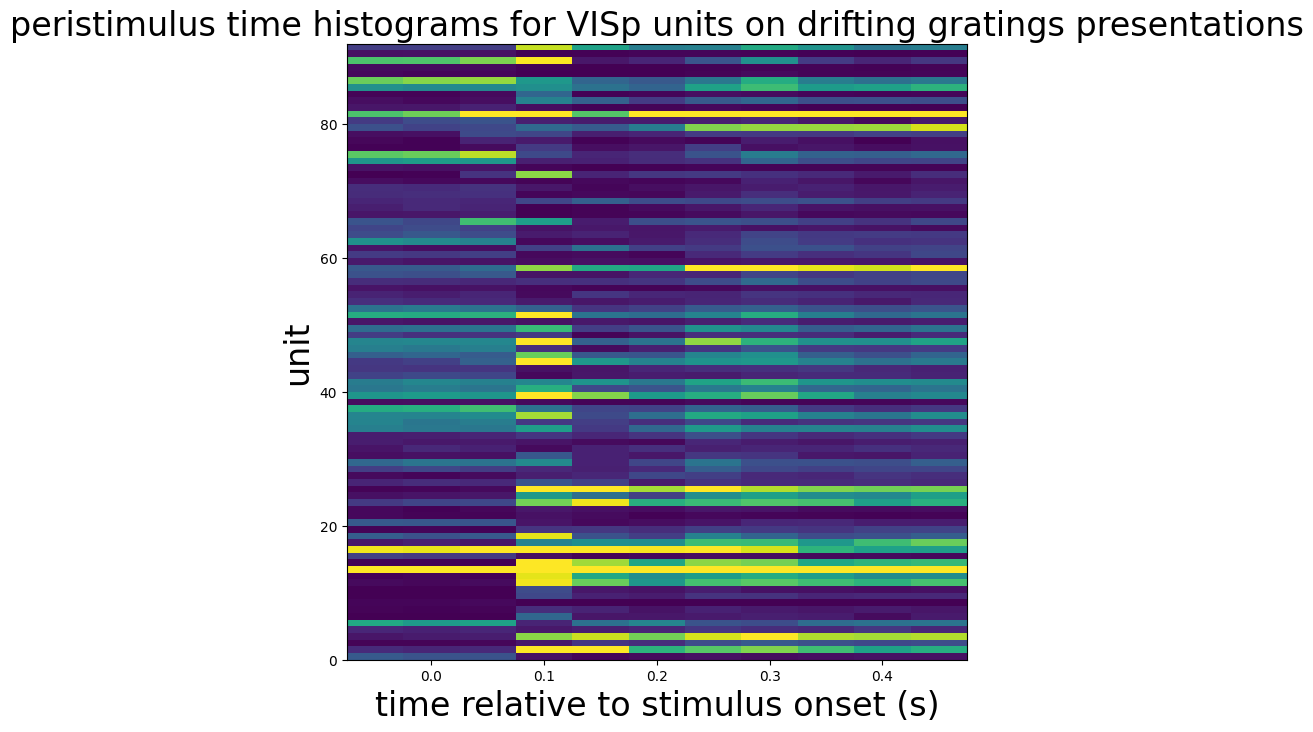

In [8]:
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on drifting gratings presentations", fontsize=24)

plt.show()

### Look at firing rate of specific neurons, split by grating orientation

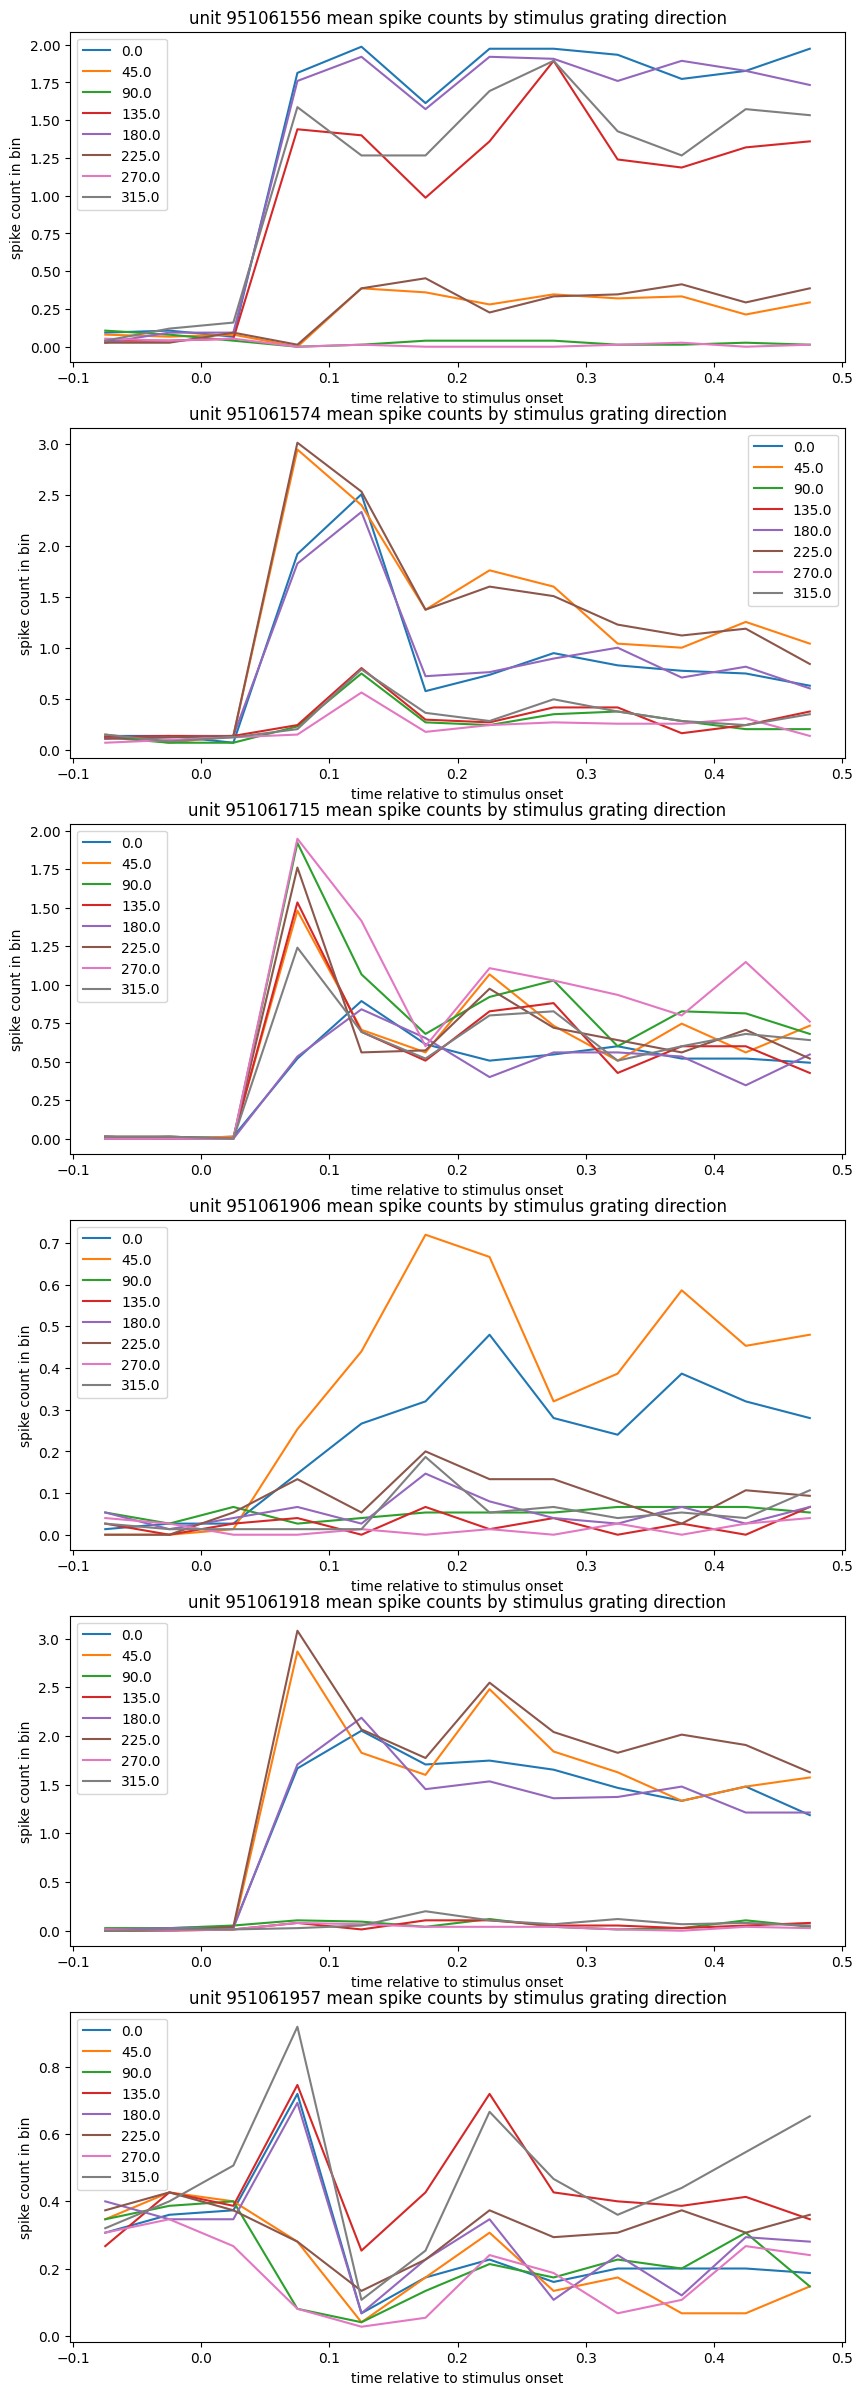

In [9]:
# for each unit, make plots of averaged responses across each orientation, aligned to stim onset

# a list of interesting units predetermined by looking data/patrick_scratch/unit_frs_analysis figures
interesting_units = [
    951061556,
    951061574,
    951061715,
    951061906,
    951061918,
    951061957
]
fig, ax = plt.subplots(len(interesting_units), 1, figsize=(10, 30))

for i, unit_id in enumerate(interesting_units):
    for orientation in unique_orientations: 
        trial_ids = presentations[presentations.orientation == orientation].index.values        
        data = histograms.loc[trial_ids, :, unit_id]
        mean = data.mean(dim="stimulus_presentation_id")
        ax[i].plot(data["time_relative_to_stimulus_onset"], mean, label=orientation)
    ax[i].legend()
    ax[i].set_xlabel("time relative to stimulus onset")
    ax[i].set_ylabel("spike count in bin")
    ax[i].set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")


## Focus specifically on Unit 951061556
- Plot spike counts for each stim presentation, colored by orientation
- Appreciate that activity not only varies with stim and time, but also varies on the same stim presentation? 
- General question: how to explain variation in activity?

Text(0.5, 1.0, 'unit 951061556 mean spike counts by stimulus grating direction')

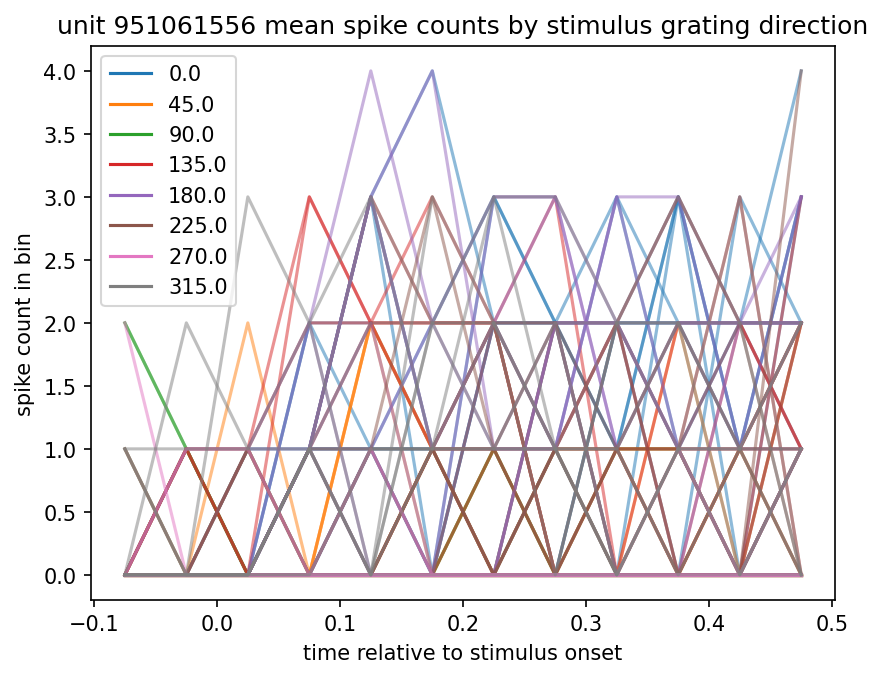

In [10]:
# plot regression result
unique_orientations.sort()

fig, ax = plt.subplots(dpi=150)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

unit_id = 951061556
for i, orientation in enumerate(unique_orientations): 
    trial_ids = presentations[presentations.orientation == orientation].index.values        
    data = histograms.loc[trial_ids, :, unit_id]
    # plot 10 instances of this stim presentation
    color = colors[i]
    for trial in range(10):
        activity = data[trial, :]
        ax.plot(data["time_relative_to_stimulus_onset"], activity, c=color, alpha=0.5)
    ax.plot([], [], label=orientation, c=color)
ax.legend()
ax.set_xlabel("time relative to stimulus onset")
ax.set_ylabel("spike count in bin")
ax.set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")

## Prep for models: Divide data into train/test sets, define r^2 helper

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

presentations.index.values
random_state = 42 # ensure each run has the same split
train_idxs, test_idxs = train_test_split(presentations.index.values, test_size=0.2, random_state=random_state)

unit_id = 951061556
orientations_train = presentations.orientation.loc[train_idxs].values
spikes_train = histograms.loc[train_idxs, :, unit_id].values

orientations_test = presentations.orientation.loc[test_idxs].values
spikes_test = histograms.loc[test_idxs, :, unit_id].values

def calc_r_squared(y_true, y_pred):
    """
    Calculates r^2 metric for true vs predicted labels
    NOTE: could also use .score() from sklearn LinearRegression here, but it's a bit unfitting since
    we'd want to evaluate r^2 for all time points, but are sometimes training different models for each time point. 
    Args: 
        y_true, y_pred of any shape
    """
    return 1 - np.sum((y_true - y_pred)**2) / np.sum(((y_true - y_true.mean()) ** 2))


## Simplest stimuluation-based regression. 
$$ r(t) = w^{stim} \times s $$
Where r(t) is neuron's activity, $ w^{stim} $ is learned weight, and s is stimulus direction

In [16]:
num_time_steps = spikes_train.shape[1]
X_train = orientations_train.repeat(num_time_steps).reshape(-1, 1)
Y_train = spikes_train.flatten()

X_test = orientations_test.repeat(num_time_steps).reshape(-1, 1)
Y_test = spikes_test.flatten()

reg = LinearRegression()
reg.fit(X_train, Y_train)

train_score = calc_r_squared(Y_train, reg.predict(X_train))
test_score = calc_r_squared(Y_test, reg.predict(X_test))
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.0028229561546554427
Test Score: 0.0012846043025420695


## Stimulus based regression with varying weights
$$ r(t) = w^{stim}(t) \times s $$
In this case, training models separately per time bin

### Train models

In [17]:
lin_reg_results = []

Y_train_preds = []
Y_test_preds = []

for i in range(spikes_train.shape[1]):
    reg = LinearRegression()
    X_train = orientations_train.reshape(-1, 1)
    Y_train = spikes_train[:, i]

    X_test = orientations_test.reshape(-1, 1)

    reg.fit(X_train, Y_train)

    lin_reg_results.append(reg)    
    Y_train_preds.append(reg.predict(X_train))
    Y_test_preds.append(reg.predict(X_test))


### Evaluate train and test scores

In [18]:
train_score = calc_r_squared(spikes_train, np.vstack(Y_train_preds).T)
test_score = calc_r_squared(spikes_test, np.vstack(Y_test_preds).T)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.12032055533298969
Test Score: 0.12097803963516807


### Visualize regression results, compare to per stim averaged by timebin

Text(0.5, 1.0, 'unit 951061556 predicted spike counts by stimulus grating direction')

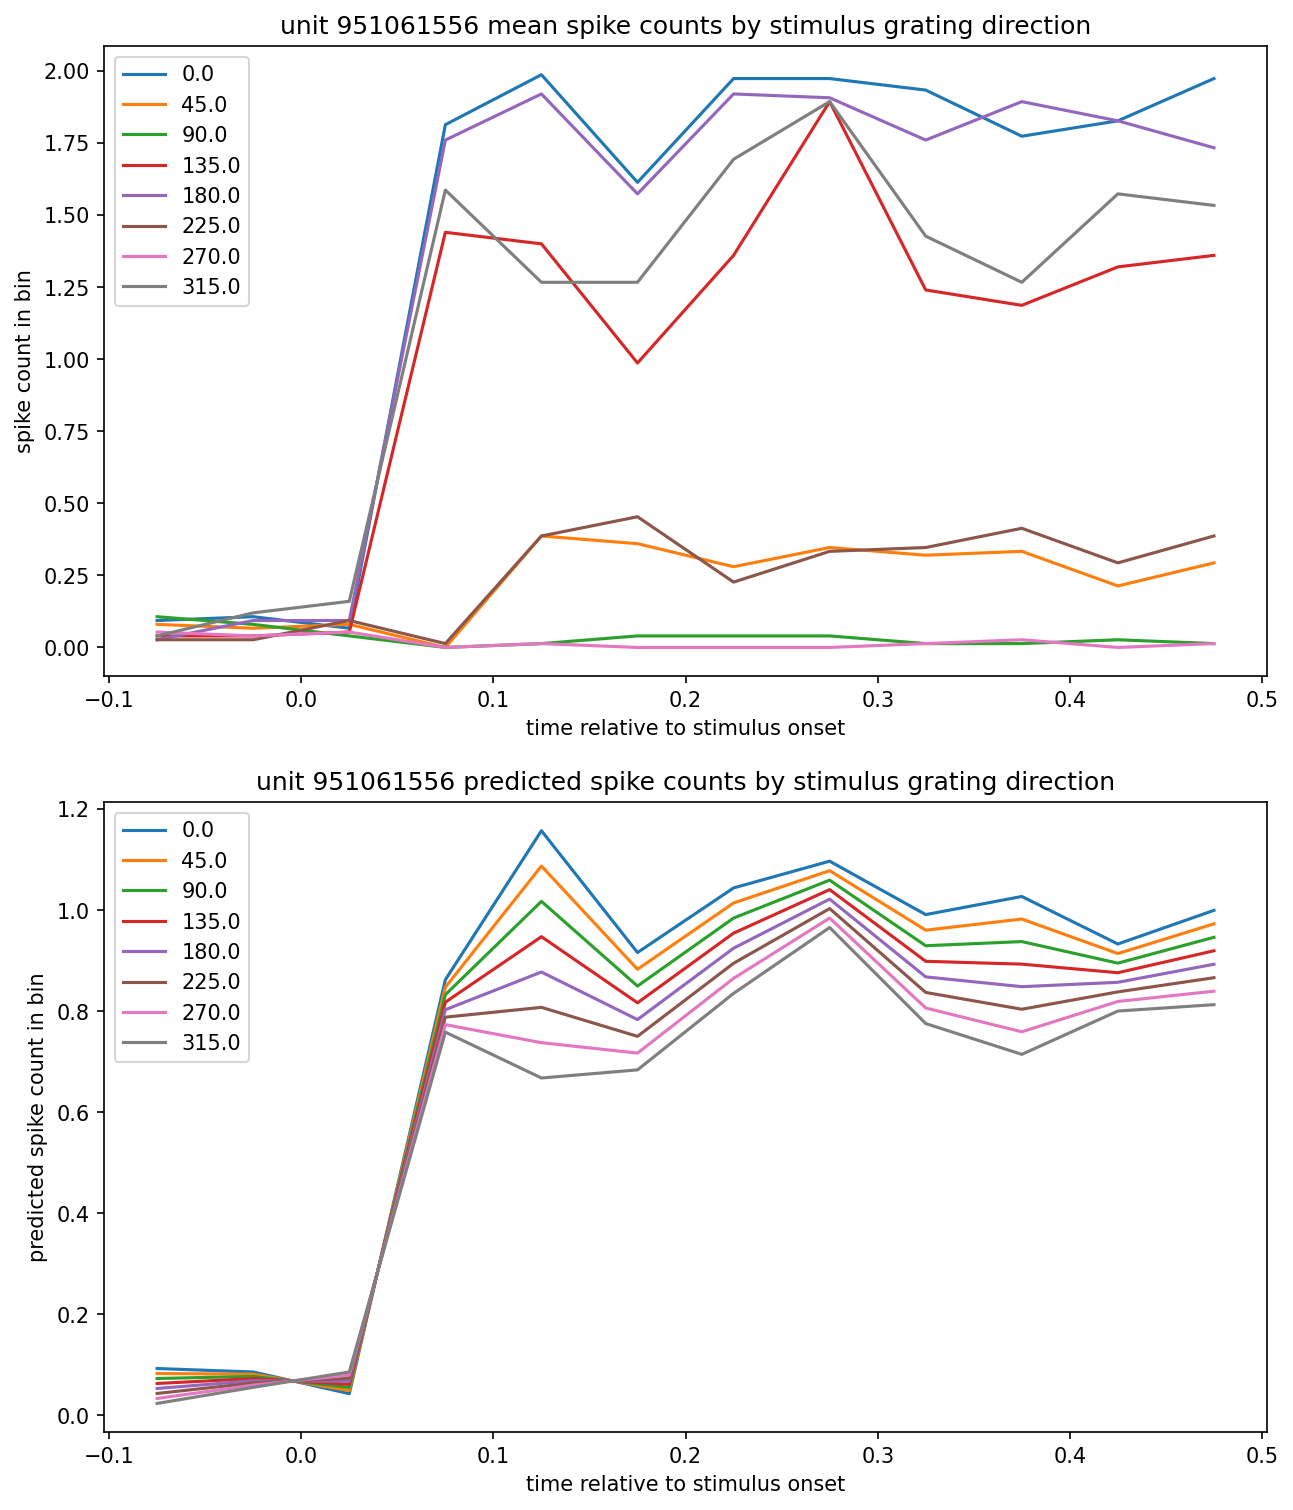

In [19]:
# plot regression result
unique_orientations.sort()

fig, ax = plt.subplots(2, 1, figsize=(10, 12), dpi=150)

unit_id = 951061556
for orientation in unique_orientations: 
    trial_ids = presentations[presentations.orientation == orientation].index.values        
    data = histograms.loc[trial_ids, :, unit_id]
    mean = data.mean(dim="stimulus_presentation_id")
    ax[0].plot(data["time_relative_to_stimulus_onset"], mean, label=orientation)
ax[0].legend()
ax[0].set_xlabel("time relative to stimulus onset")
ax[0].set_ylabel("spike count in bin")
ax[0].set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")


pred_responses = []
for res in lin_reg_results:
    pred_responses.append(res.predict(unique_orientations.reshape(-1,1)))
pred_responses = np.array(pred_responses)

for i, orientation in enumerate(unique_orientations):
    ax[1].plot(data["time_relative_to_stimulus_onset"], pred_responses[:, i], label=orientation)
ax[1].legend()
ax[1].set_xlabel("time relative to stimulus onset")
ax[1].set_ylabel("predicted spike count in bin")
ax[1].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction")

## stimulus + 1 time bin back regression

$$ r(t) = w^{stim}(t) \times s + w^{auto}_{t-1}(t) \times r(t-1) $$

Per timestep, is variation in activity explained by stim direction as well as previous activity?

In [16]:
def get_X_auto_reg(spikes, orientations, i):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps
        orientations: data array of num_trials
        i: index of time bin
    """
    return np.stack([orientations, spikes[:, i-1]]).T

auto_reg_results = []
Y_train_preds = []
Y_test_preds = []
for i in range(spikes_train.shape[1]):
    if i >= 1:
        reg = LinearRegression()
        X_train = get_X_auto_reg(spikes_train, orientations_train, i)
        X_test = get_X_auto_reg(spikes_test, orientations_test, i)

        Y_train = spikes_train[:, i]
        reg.fit(X_train, Y_train)
        auto_reg_results.append(reg)

        Y_train_preds.append(reg.predict(X_train))
        Y_test_preds.append(reg.predict(X_test))

In [17]:
train_score = calc_r_squared(spikes_train[:, 1:], np.vstack(Y_train_preds).T)
test_score = calc_r_squared(spikes_test[:, 1:], np.vstack(Y_test_preds).T)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.3796521752797779
Test Score: 0.35576335856532204


Text(0.5, 1.0, 'unit 951061556 predicted spike counts by stimulus grating direction + autoregression')

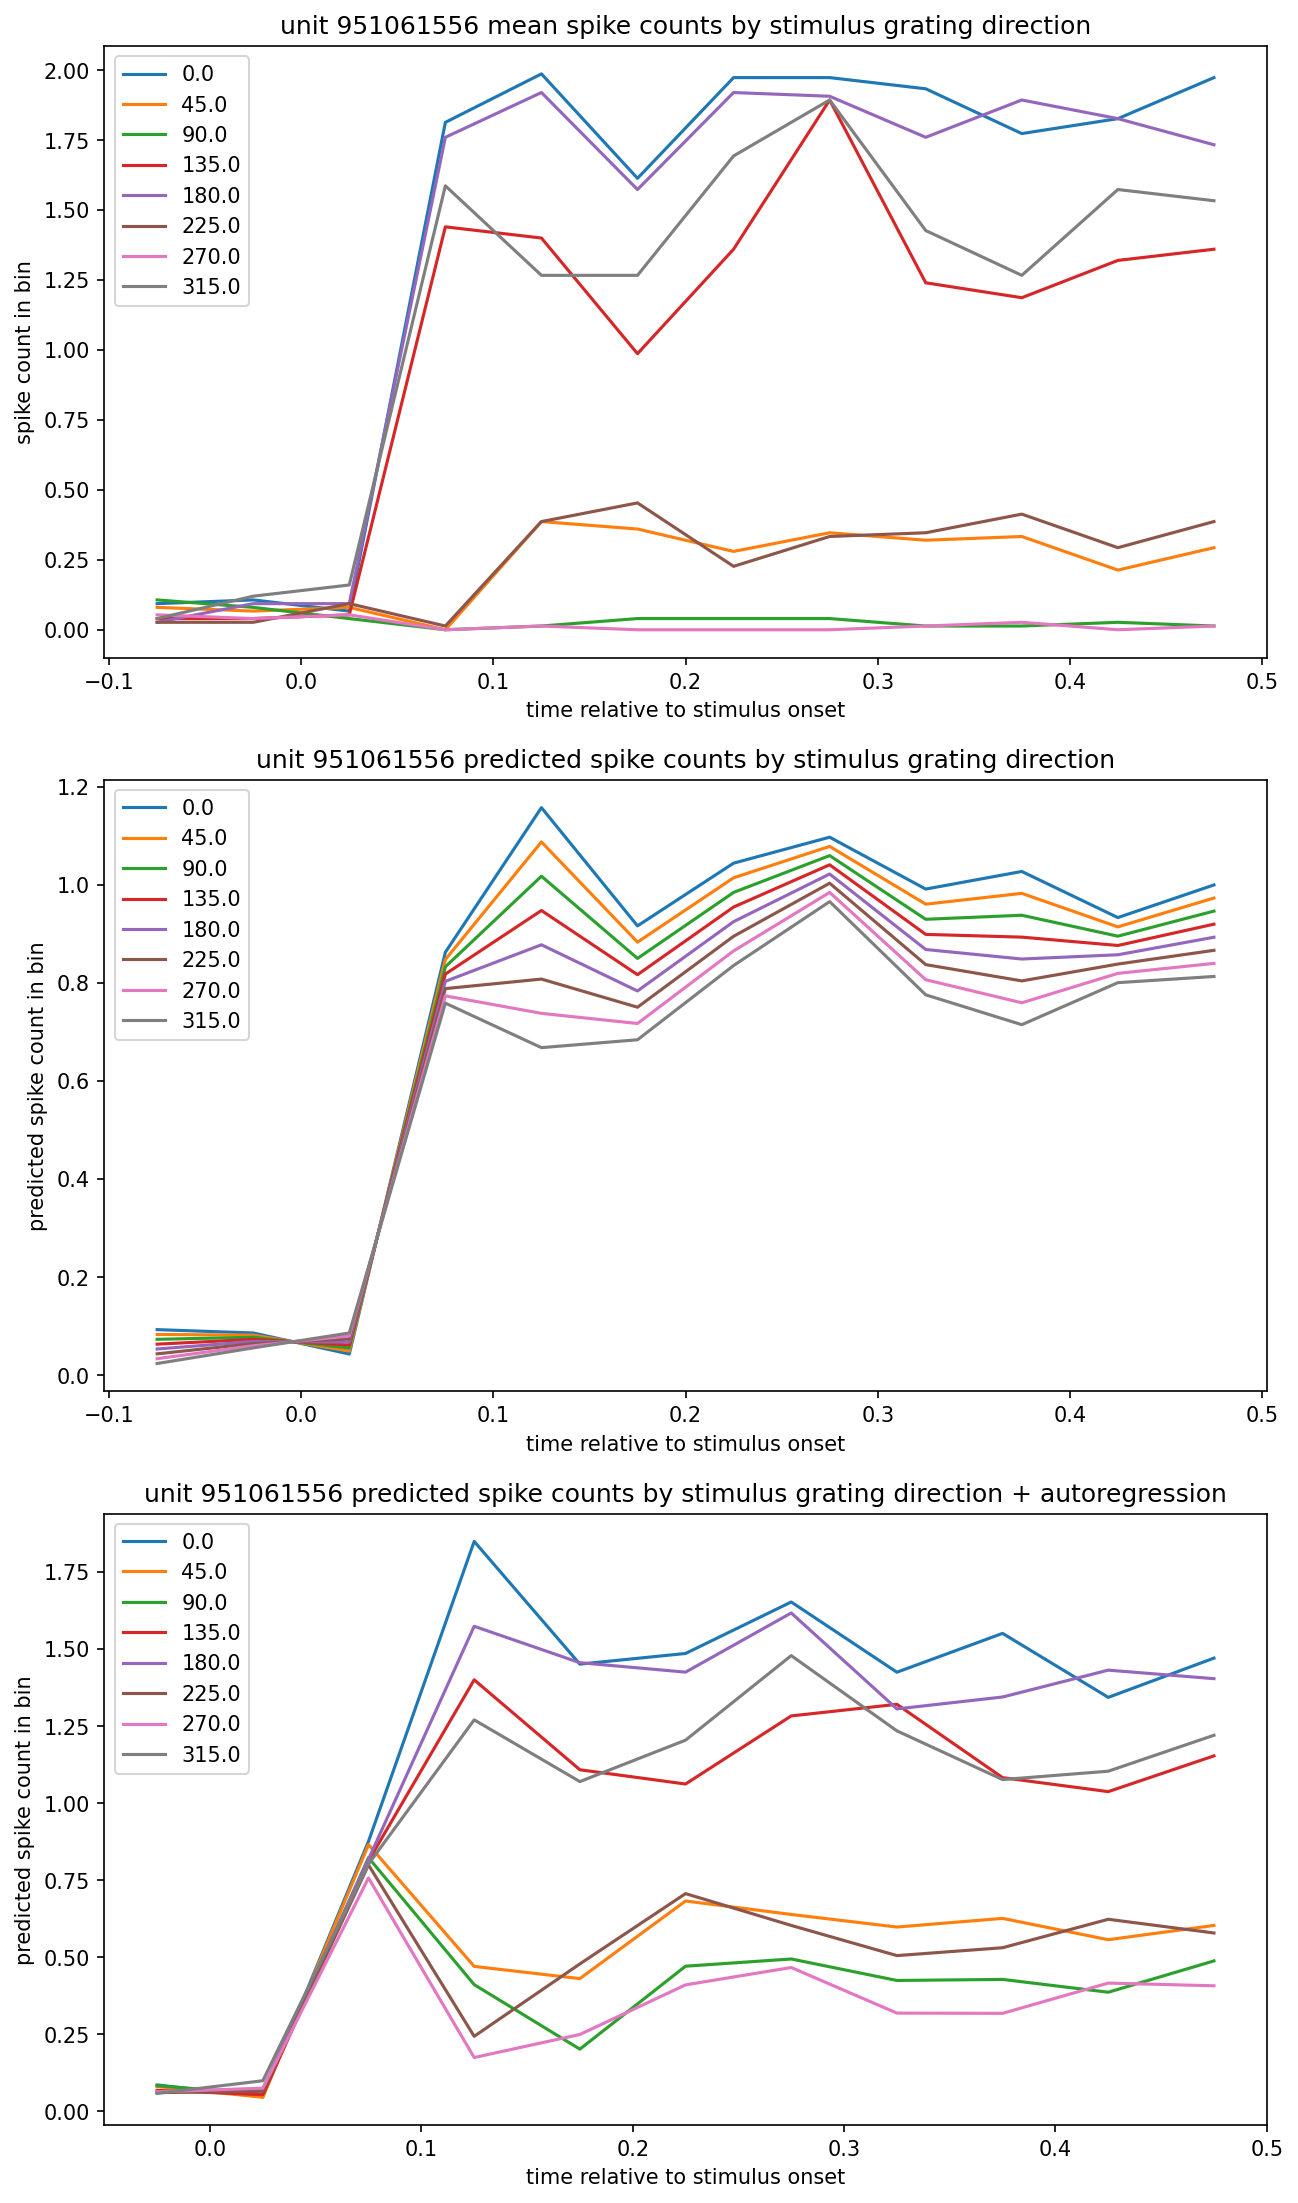

In [18]:
# plot regression result
unique_orientations.sort()

fig, ax = plt.subplots(3, 1, figsize=(10, 18), dpi=150)

unit_id = 951061556
for orientation in unique_orientations: 
    trial_ids = presentations[presentations.orientation == orientation].index.values        
    data = histograms.loc[trial_ids, :, unit_id]
    mean = data.mean(dim="stimulus_presentation_id")
    ax[0].plot(data["time_relative_to_stimulus_onset"], mean, label=orientation)
ax[0].legend()
ax[0].set_xlabel("time relative to stimulus onset")
ax[0].set_ylabel("spike count in bin")
ax[0].set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")


# stimulus-based regression
pred_responses = []
for res in lin_reg_results:
    pred_responses.append(res.predict(unique_orientations.reshape(-1,1)))
pred_responses = np.array(pred_responses)

for i, orientation in enumerate(unique_orientations):
    ax[1].plot(data["time_relative_to_stimulus_onset"], pred_responses[:, i], label=orientation)
ax[1].legend()
ax[1].set_xlabel("time relative to stimulus onset")
ax[1].set_ylabel("predicted spike count in bin")
ax[1].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction")

# plot auto regressive model means
pred_mean_responses = np.empty((len(unique_orientations), len(auto_reg_results)))
for i, res in enumerate(auto_reg_results):
    time_bin_idx = i + 1
    for j, orientation in enumerate(unique_orientations):
        trial_ids = presentations[presentations.orientation == orientation].index.values     
        orientations = np.repeat(orientation, len(trial_ids))
        data = histograms.loc[trial_ids, :, unit_id]
        # X = np.stack([unique_orientations, pred_responses[-1]]).T
        X = get_X_auto_reg(data, orientations, time_bin_idx)
        Y = res.predict(X)
        pred_mean_responses[j, i] = np.mean(Y)

for j, orientation in enumerate(unique_orientations):
    ax[2].plot(data["time_relative_to_stimulus_onset"][1:], pred_mean_responses[j, :], label=orientation)
ax[2].legend()
ax[2].set_xlabel("time relative to stimulus onset")
ax[2].set_ylabel("predicted spike count in bin")
ax[2].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction + autoregression")

## Same autoregressive model, but what if we added more lag?

$$ r(t) = w^{stim}(t) \times s + \sum_{i=1}^T w^{auto}_{t-i}(t) \times r(t-i) $$

How do scores vary with choice of lag T we choose?

In [54]:
def get_X_auto_reg(spikes, orientations, i, T):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps
        orientations: data array of num_trials
        i: index of time bin
        T: total lag
    """
    orientations = np.expand_dims(orientations, axis=1)
    return np.concatenate([orientations, spikes[:, i-T:i]], axis=1)

train_scores = []
test_scores = []
auto_reg_results = {}

for T in range(1, 10):
    auto_reg_fits = []
    Y_train_preds = []
    Y_test_preds = []
    for i in range(spikes_train.shape[1]):
        if i >= T:
            # should drop the first T bins?
            reg = LinearRegression()
            X_train = get_X_auto_reg(spikes_train, orientations_train, i, T)
            X_test = get_X_auto_reg(spikes_test, orientations_test, i, T)

            Y_train = spikes_train[:, i]
            reg.fit(X_train, Y_train)
            auto_reg_fits.append(reg)

            Y_train_preds.append(reg.predict(X_train))
            Y_test_preds.append(reg.predict(X_test))
    # evaluate bin index [T: )
    train_score = calc_r_squared(spikes_train[:, T:], np.vstack(Y_train_preds).T)
    test_score = calc_r_squared(spikes_test[:, T:], np.vstack(Y_test_preds).T)
    train_scores.append(train_score)
    test_scores.append(test_score)
    auto_reg_results[T] = auto_reg_fits

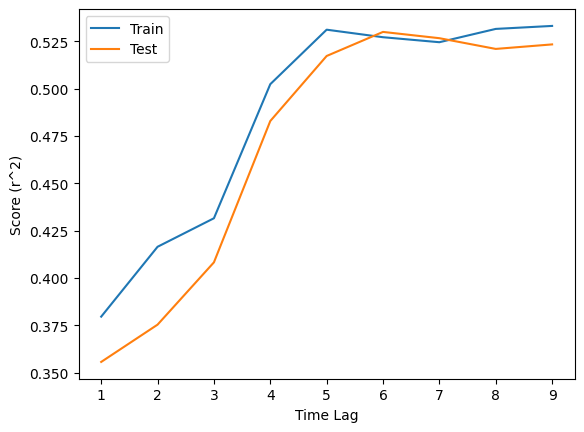

In [55]:
fig, ax = plt.subplots()
ax.plot(range(1, 10), train_scores, label="Train")
ax.plot(range(1, 10), test_scores, label="Test")
ax.set_xlabel("Time Lag")
ax.set_ylabel("Score (r^2)")
ax.legend()

## How do auto-regressive coefficients change over the course of a trial?

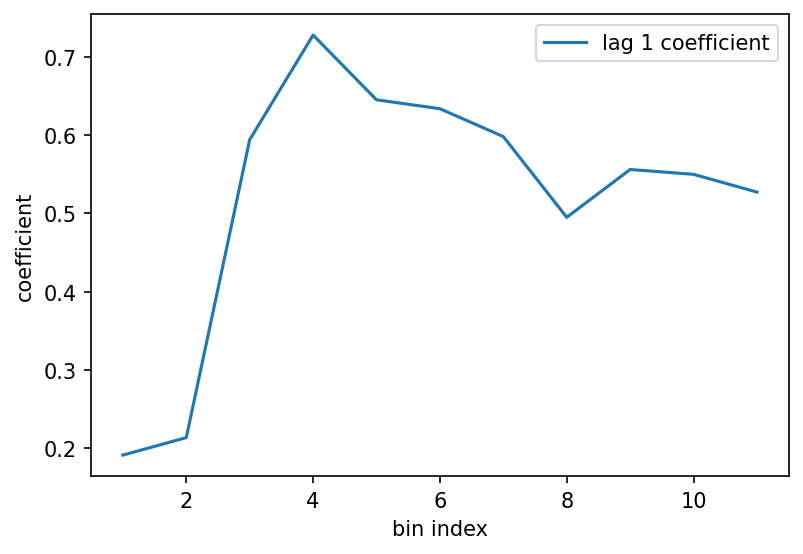

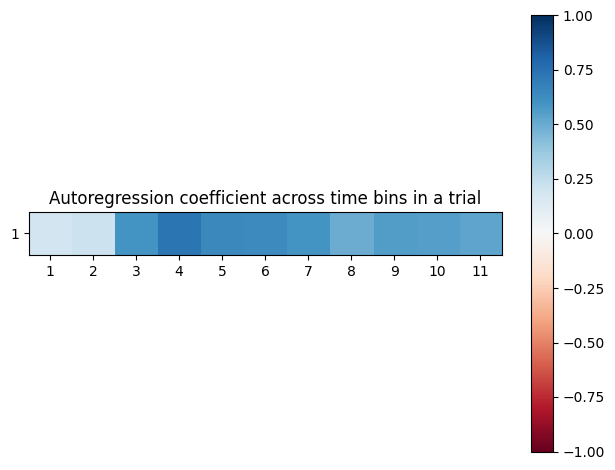

In [74]:
# use time_lag=1 model as an exmaple

lag_model = 1
reg_coeff = []
for i, reg in enumerate(auto_reg_results[lag_model]):
    reg_coeff.append(reg.coef_[1:])
reg_coeff = np.array(reg_coeff)

# plot
fig, ax = plt.subplots(figsize=(6,4), dpi=150)
for j in range(reg_coeff.shape[1]):
    ax.plot(np.arange(lag_model, lag_model+reg_coeff.shape[0]), reg_coeff[:, j], 
            label=f'lag {lag_model-j} coefficient')
ax.set_xlabel("bin index")
ax.set_ylabel("coefficient")
ax.legend()


fig, ax = plt.subplots()
im = ax.imshow(reg_coeff.T, cmap='RdBu', vmin=-1, vmax=1)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(reg_coeff.shape[0]))
ax.set_xticklabels(np.arange(lag_model, lag_model+reg_coeff.shape[0]))
ax.set_yticks(np.arange(reg_coeff.shape[1]))
ax.set_yticklabels(np.arange(reg_coeff.shape[1], 0, -1))
ax.set_title("Autoregression coefficient across time bins in a trial")
fig.colorbar(im, ax=ax)
fig.tight_layout()

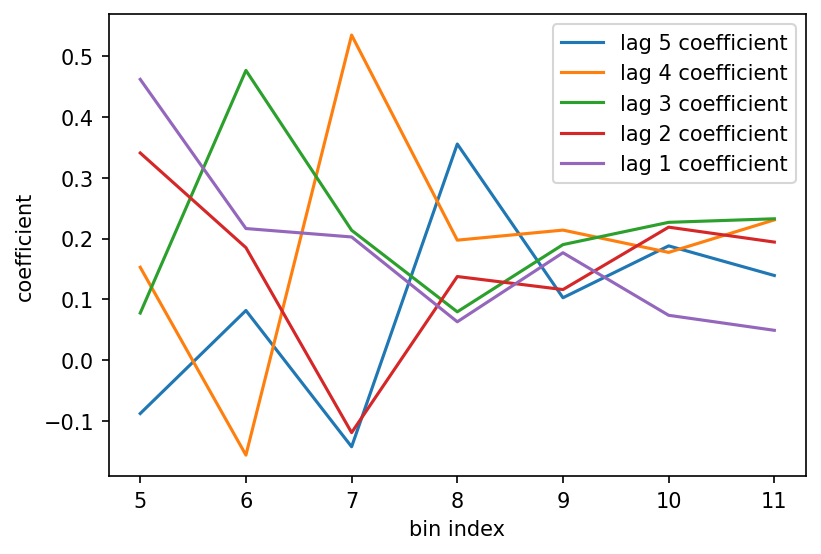

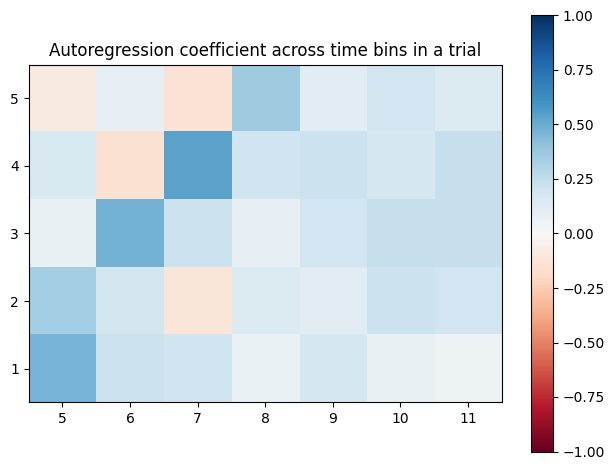

In [75]:
# use time_lag=5 model as an exmaple

lag_model = 5
reg_coeff = []
for i, reg in enumerate(auto_reg_results[lag_model]):
    reg_coeff.append(reg.coef_[1:])
reg_coeff = np.array(reg_coeff)

# plot
fig, ax = plt.subplots(figsize=(6,4), dpi=150)
for j in range(reg_coeff.shape[1]):
    ax.plot(np.arange(lag_model, lag_model+reg_coeff.shape[0]), reg_coeff[:, j], 
            label=f'lag {lag_model-j} coefficient')
ax.set_xlabel("bin index")
ax.set_ylabel("coefficient")
ax.legend()


fig, ax = plt.subplots()
im = ax.imshow(reg_coeff.T, cmap='RdBu', vmin=-1, vmax=1)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(reg_coeff.shape[0]))
ax.set_xticklabels(np.arange(lag_model, lag_model+reg_coeff.shape[0]))
ax.set_yticks(np.arange(reg_coeff.shape[1]))
ax.set_yticklabels(np.arange(reg_coeff.shape[1], 0, -1))
ax.set_title("Autoregression coefficient across time bins in a trial")
fig.colorbar(im, ax=ax)
fig.tight_layout()

## Another auto regressive model: 
Maybe don't consider each time point separately?
Can introduce a lag for stims as well as a lag for past activity, but weights don't change per timestep
$$ r(t) = \sum_{i=0}^{T_{stim}} w^{stim}_{t-i} s(t-i) + \sum_{i=1}^{T_{auto}} w^{auto}_{t-i}  r(t-i) $$

Note: we run into a bit of issue here since the stim traditionally is expressed in degrees (0, 45, 90 etc.) However, since we're introducing a time component, it'd make sense to differentiate when the stim is on vs. off, as well as the direction of the stim. Just using degrees doesn't allow us to do this, since 0 degrees != stim-off. One idea would be to translate the stim degrees as x,y cosine and sine components, and have x=0,y=0 indicate stim-off. 

### Re-run linear regression with sine/cosine features

In [44]:
def get_sines_cosines_from_orientations(orientations):
    """
    Takes in orientations as degrees
    returns sines and cosines as np array of dims data_points x 2
    """
    radians = orientations.astype(float) * np.pi / 180
    sines = np.sin(radians)
    cosines = np.cos(radians)
    return np.vstack([cosines, sines]).T


In [40]:
sines = np.sin(radians)
cosines = np.cos(radians)
X = np.vstack([cosines, sines]).T

In [46]:
sin_cos_results = []
for i in range(spikes.shape[1]):
    reg = LinearRegression()
    X = get_sines_cosines_from_orientations(orientations)
    Y = spikes[:, i]
    reg.fit(X, Y)
    sin_cos_results.append(reg)

Text(0.5, 1.0, 'unit 951061556 predicted spike counts by stimulus grating direction')

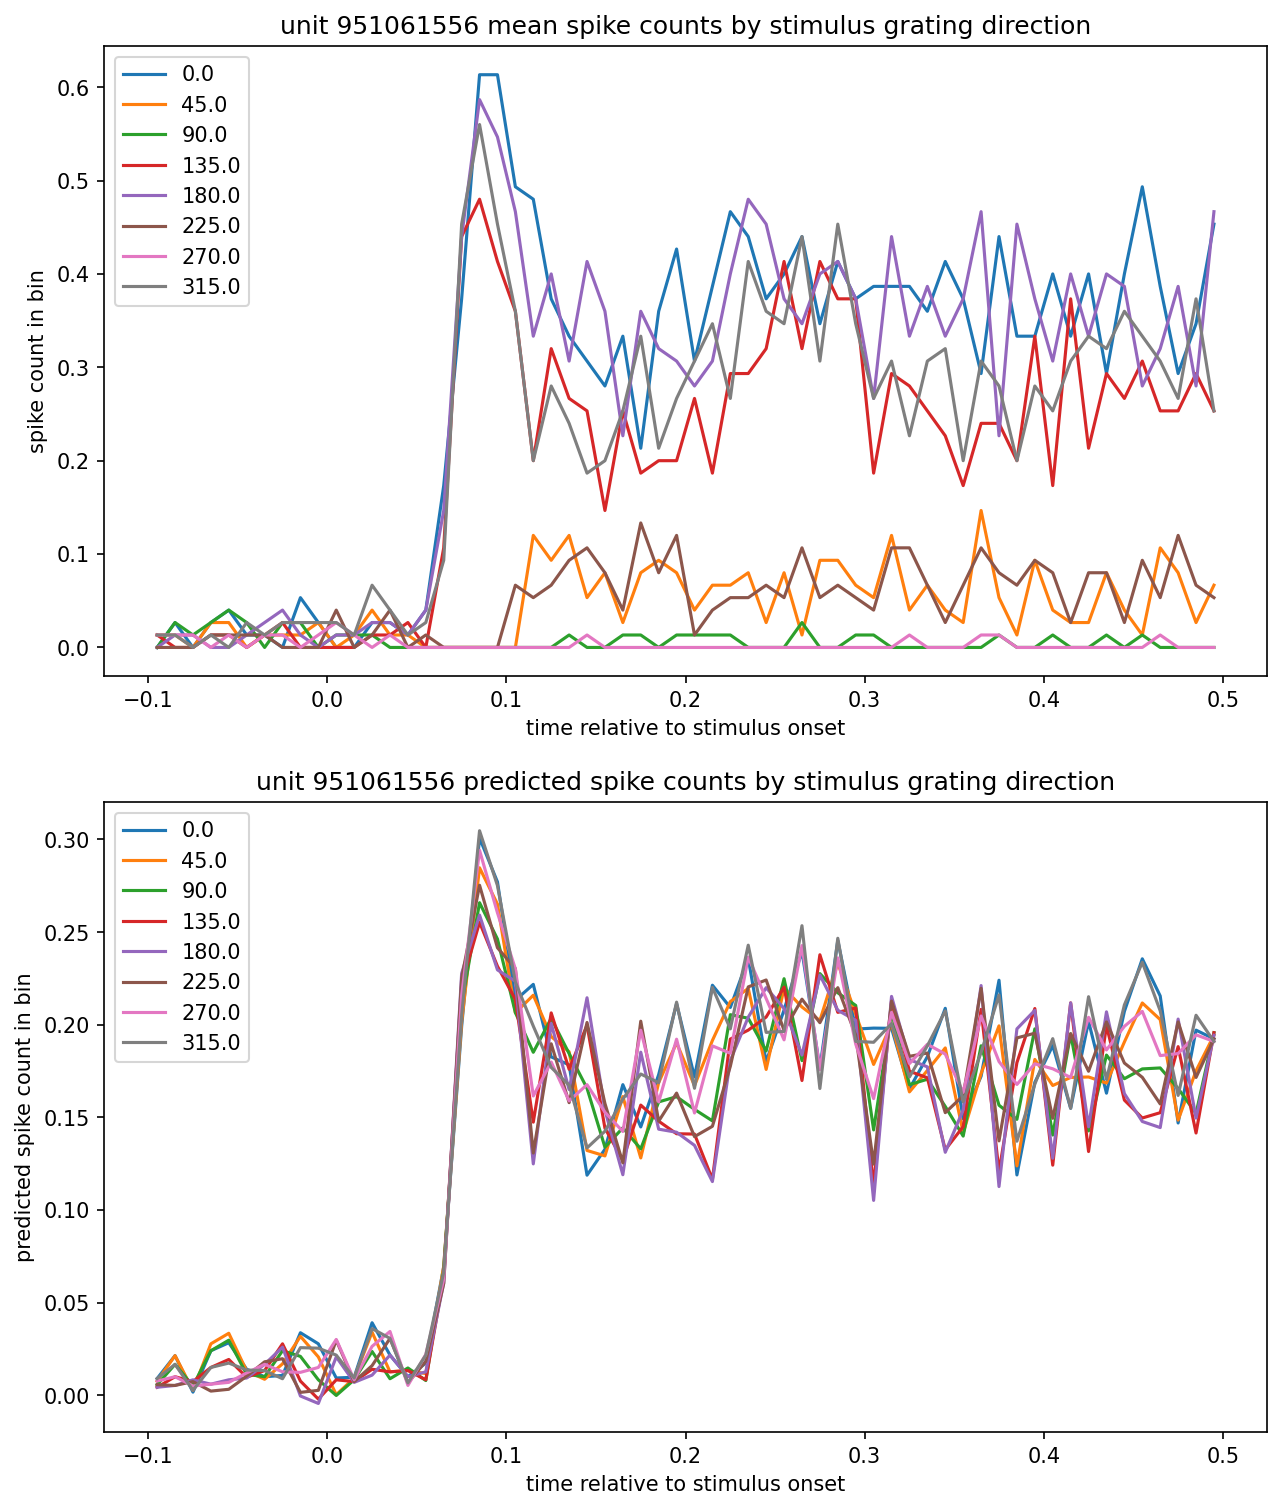

In [47]:
# plot regression result
unique_orientations.sort()

fig, ax = plt.subplots(2, 1, figsize=(10, 12), dpi=150)

unit_id = 951061556
for orientation in unique_orientations: 
    trial_ids = presentations[presentations.orientation == orientation].index.values        
    data = histograms.loc[trial_ids, :, unit_id]
    mean = data.mean(dim="stimulus_presentation_id")
    ax[0].plot(data["time_relative_to_stimulus_onset"], mean, label=orientation)
ax[0].legend()
ax[0].set_xlabel("time relative to stimulus onset")
ax[0].set_ylabel("spike count in bin")
ax[0].set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")


pred_responses = []
for res in sin_cos_results:
    pred_responses.append(res.predict(get_sines_cosines_from_orientations(unique_orientations)))
pred_responses = np.array(pred_responses)

for i, orientation in enumerate(unique_orientations):
    ax[1].plot(data["time_relative_to_stimulus_onset"], pred_responses[:, i], label=orientation)
ax[1].legend()
ax[1].set_xlabel("time relative to stimulus onset")
ax[1].set_ylabel("predicted spike count in bin")
ax[1].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction")

# stimulus-based regression + autoregression with fixed weights per time bin

## stimulus + 1 time bin back

In [95]:
def get_X_auto_reg(spikes, orientations, i):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps
        orientations: data array of num_trials
        i: index of time bin
    """
    return np.stack([orientations, spikes[:, i-1]]).T

X_train, Y_train = [], []
X_test, Y_test = [], []

Y_train_preds = []
Y_test_preds = []

for i in range(spikes_train.shape[1]):
    if i >= 1:
        X_train_i = get_X_auto_reg(spikes_train, orientations_train, i)
        X_test_i = get_X_auto_reg(spikes_test, orientations_test, i)
        Y_train_i = spikes_train[:, i]
        Y_test_i = spikes_test[:, i]

        X_train.append(X_train_i)
        X_test.append(X_test_i)
        Y_train.append(Y_train_i)
        Y_test.append(Y_test_i)

X_train = np.array(X_train).reshape(-1, 2)
X_test = np.array(X_test).reshape(-1, 2)
Y_train = np.array(Y_train).reshape(-1, 1)
Y_test = np.array(Y_test).reshape(-1, 1)

reg = LinearRegression()
reg.fit(X_train, Y_train)

Y_train_preds.append(reg.predict(X_train))
Y_test_preds.append(reg.predict(X_test))

In [96]:
train_score = calc_r_squared(Y_train, np.vstack(Y_train_preds))
test_score = calc_r_squared(Y_test, np.vstack(Y_test_preds))

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.3390309852961072
Test Score: 0.31961728527890965


Text(0.5, 1.0, 'unit 951061556 predicted spike counts by stimulus grating direction + autoregression, fixed weight')

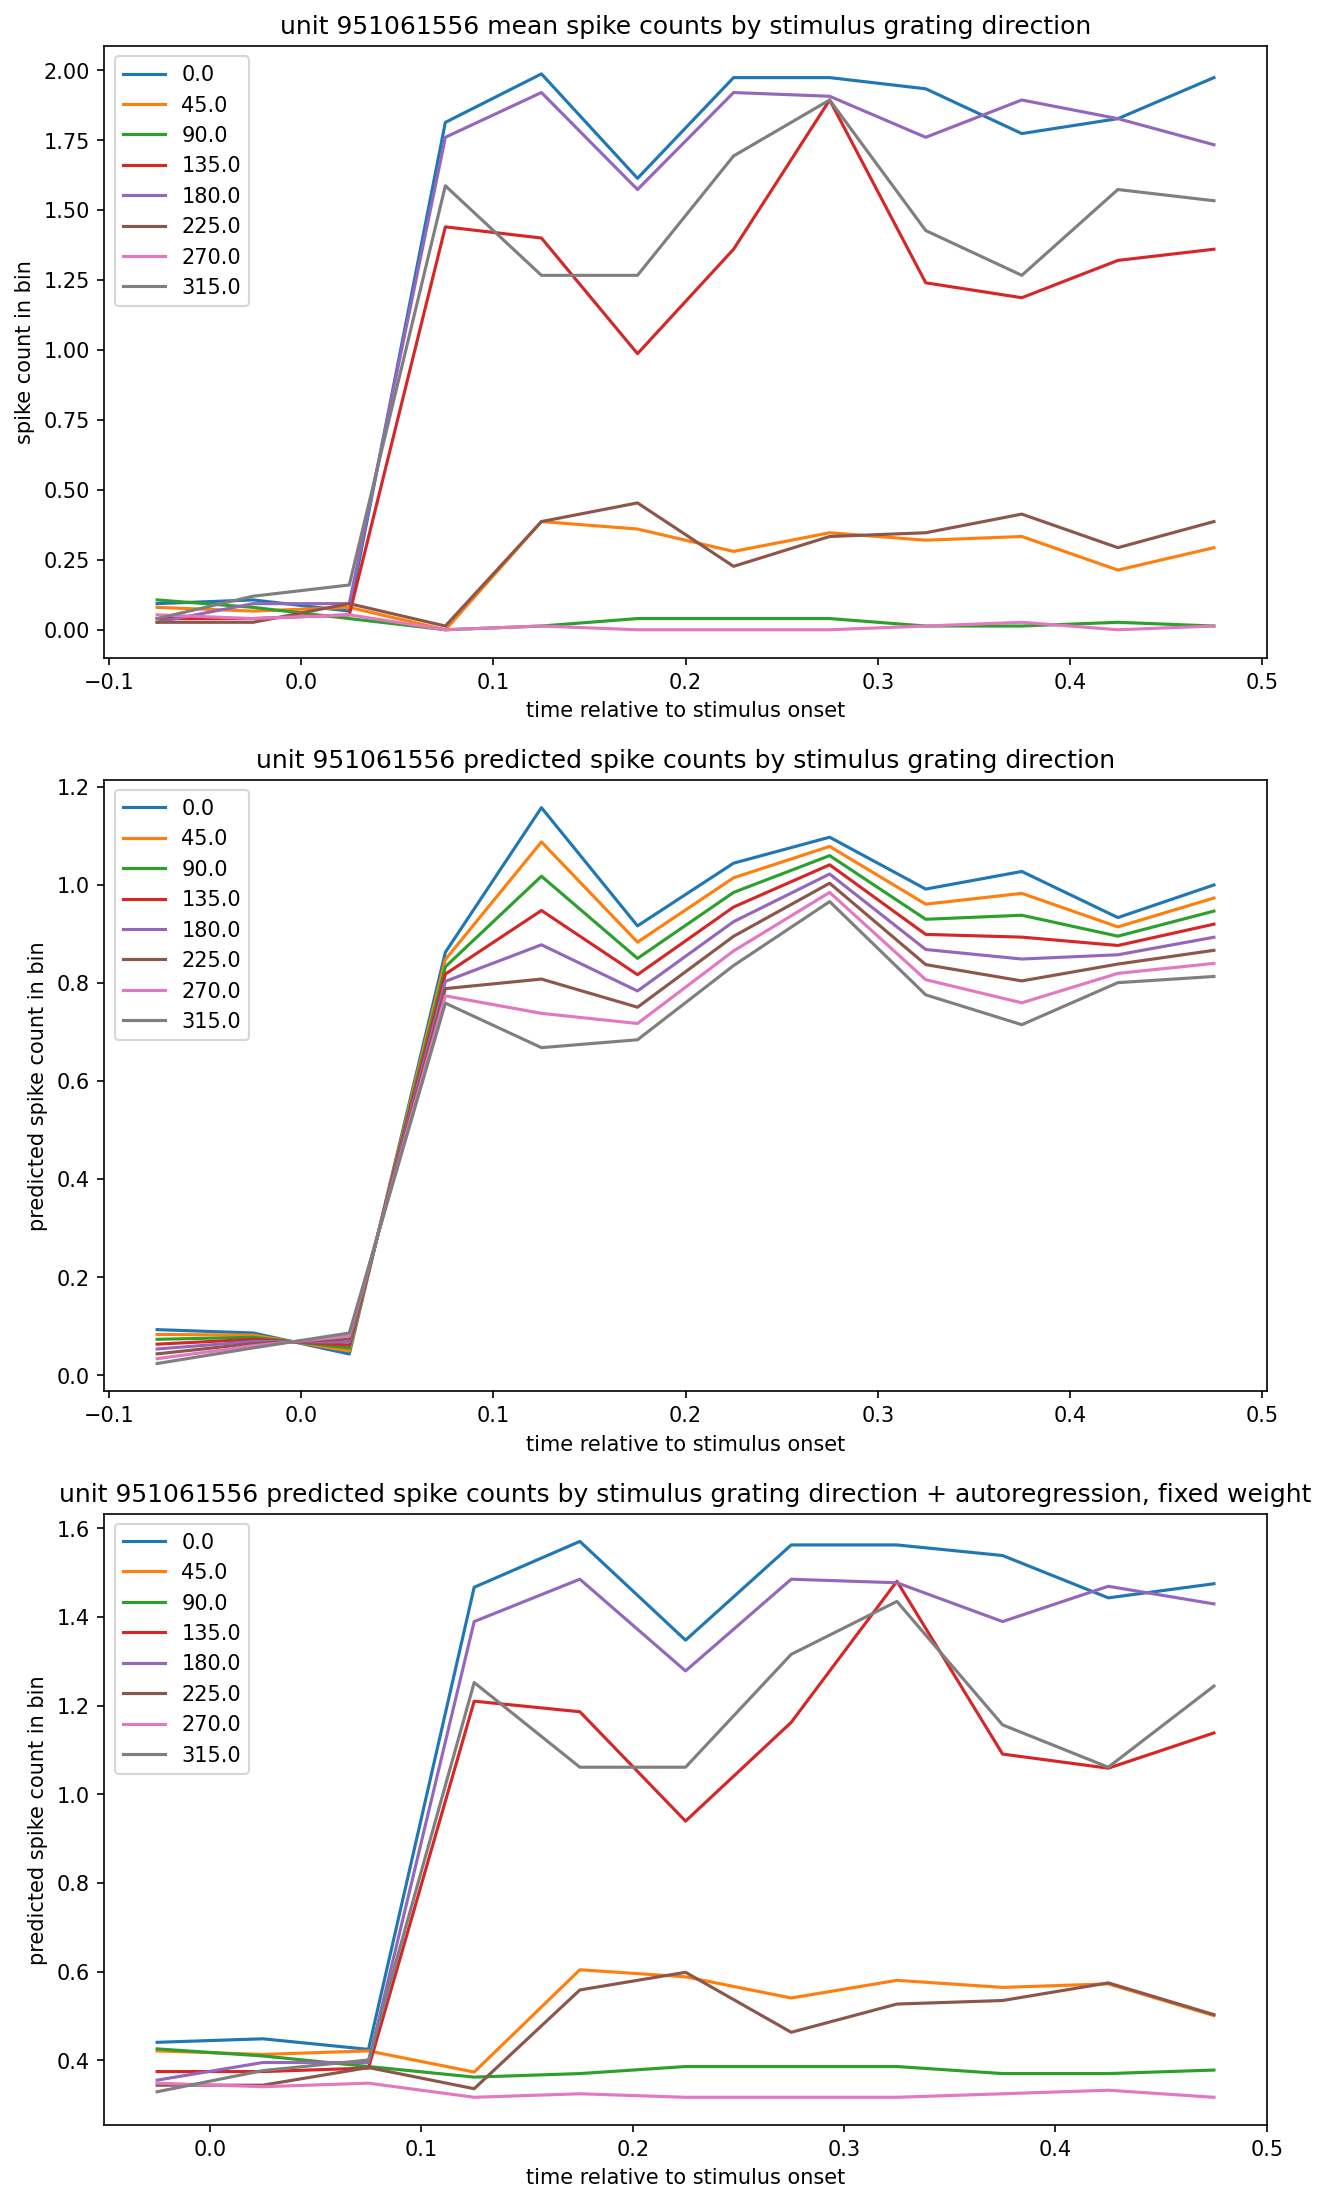

In [102]:
# plot regression result
unique_orientations.sort()

fig, ax = plt.subplots(3, 1, figsize=(10, 18), dpi=150)

unit_id = 951061556
for orientation in unique_orientations: 
    trial_ids = presentations[presentations.orientation == orientation].index.values        
    data = histograms.loc[trial_ids, :, unit_id]
    mean = data.mean(dim="stimulus_presentation_id")
    ax[0].plot(data["time_relative_to_stimulus_onset"], mean, label=orientation)
ax[0].legend()
ax[0].set_xlabel("time relative to stimulus onset")
ax[0].set_ylabel("spike count in bin")
ax[0].set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")


# stimulus-based regression
pred_responses = []
for res in lin_reg_results:
    pred_responses.append(res.predict(unique_orientations.reshape(-1,1)))
pred_responses = np.array(pred_responses)

for i, orientation in enumerate(unique_orientations):
    ax[1].plot(data["time_relative_to_stimulus_onset"], pred_responses[:, i], label=orientation)
ax[1].legend()
ax[1].set_xlabel("time relative to stimulus onset")
ax[1].set_ylabel("predicted spike count in bin")
ax[1].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction")

# plot auto regressive model means
pred_mean_responses = np.empty((len(unique_orientations), spikes_train.shape[1]-1))
for i in range(spikes_train.shape[1]-1):
    time_bin_idx = i + 1
    for j, orientation in enumerate(unique_orientations):
        trial_ids = presentations[presentations.orientation == orientation].index.values     
        orientations = np.repeat(orientation, len(trial_ids))
        data = histograms.loc[trial_ids, :, unit_id]
        # X = np.stack([unique_orientations, pred_responses[-1]]).T
        X = get_X_auto_reg(data, orientations, time_bin_idx)
        Y = reg.predict(X)
        pred_mean_responses[j, i] = np.mean(Y)

for j, orientation in enumerate(unique_orientations):
    ax[2].plot(data["time_relative_to_stimulus_onset"][1:], pred_mean_responses[j, :], label=orientation)
ax[2].legend()
ax[2].set_xlabel("time relative to stimulus onset")
ax[2].set_ylabel("predicted spike count in bin")
ax[2].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction + autoregression, fixed weight")

observation: the model shared weights performs similarly well with time-varying weight models

## longer history

In [111]:
def get_X_auto_reg(spikes, orientations, i, T):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps
        orientations: data array of num_trials
        i: index of time bin
        T: total lag
    """
    orientations = np.expand_dims(orientations, axis=1)
    return np.concatenate([orientations, spikes[:, i-T:i]], axis=1)


auto_reg_fixed_weights_fits = []
train_scores = []
test_scores = []

for T in range(1, 10):
    print(f'fitting model of lag {T}')
    X_train, Y_train = [], []
    X_test, Y_test = [], []

    auto_reg_fits = []
    Y_train_preds = []
    Y_test_preds = []

    for i in range(spikes_train.shape[1]):
        if i >= T:
            X_train_i = get_X_auto_reg(spikes_train, orientations_train, i, T)
            X_test_i = get_X_auto_reg(spikes_test, orientations_test, i, T)
            Y_train_i = spikes_train[:, i]
            Y_test_i = spikes_test[:, i]

            X_train.append(X_train_i)
            X_test.append(X_test_i)
            Y_train.append(Y_train_i)
            Y_test.append(Y_test_i)

    X_train = np.array(X_train).reshape(-1, T+1)
    X_test = np.array(X_test).reshape(-1, T+1)
    Y_train = np.array(Y_train).reshape(-1, 1)
    Y_test = np.array(Y_test).reshape(-1, 1)

    reg = LinearRegression()
    reg.fit(X_train, Y_train)
    auto_reg_fixed_weights_fits.append(reg)

    Y_train_preds.append(reg.predict(X_train))
    Y_test_preds.append(reg.predict(X_test))

    # evaluate bin index [T: )
    train_score = calc_r_squared(Y_train, np.vstack(Y_train_preds))
    test_score = calc_r_squared(Y_test, np.vstack(Y_test_preds))
    train_scores.append(train_score)
    test_scores.append(test_score)

fitting model of lag 1
fitting model of lag 2
fitting model of lag 3
fitting model of lag 4
fitting model of lag 5
fitting model of lag 6
fitting model of lag 7
fitting model of lag 8
fitting model of lag 9


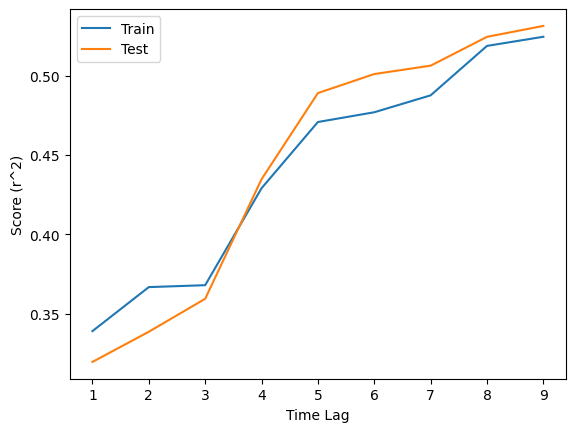

In [112]:
fig, ax = plt.subplots()
ax.plot(range(1, 10), train_scores, label="Train")
ax.plot(range(1, 10), test_scores, label="Test")
ax.set_xlabel("Time Lag")
ax.set_ylabel("Score (r^2)")
ax.legend()

## check regression coefficients

In [120]:
model_lag = 1
reg_model = auto_reg_fixed_weights_fits[model_lag-1]
print(f'lag-{model_lag} model coefficients')
print(f' {reg_model.coef_[0, 1:]}')

model_lag = 5
reg_model = auto_reg_fixed_weights_fits[model_lag-1]
print(f'lag-{model_lag} model coefficients')
print(f' {reg_model.coef_[0, 1:]}')

lag-1 model coefficients
 [0.59690098]
lag-5 model coefficients
 [0.00999872 0.14720429 0.19181358 0.21902063 0.28316707]


# Models with activities from other neurons

In [20]:
# using the list of interesting units predetermined by looking data/patrick_scratch/unit_frs_analysis figures
interesting_units = [
    951061556,
    951061574,
    951061715,
    951061906,
    951061918,
    951061957
]
target_unit_id = 951061556

presentations.index.values
random_state = 42 # ensure each run has the same split
train_idxs, test_idxs = train_test_split(presentations.index.values, test_size=0.2, random_state=random_state)

orientations_train = presentations.orientation.loc[train_idxs].values
spikes_train = histograms.loc[train_idxs, :, interesting_units].values

orientations_test = presentations.orientation.loc[test_idxs].values
spikes_test = histograms.loc[test_idxs, :, interesting_units].values

## stimulus + 1 time bin back

In [21]:
def get_X_auto_reg_population(spikes, orientations, i):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps x num_units
        orientations: data array of num_trials
        i: index of time bin
    """
    return np.concatenate([orientations[:, None], spikes[:, i-1, :]], axis=1)

X_train, Y_train = [], []
X_test, Y_test = [], []

Y_train_preds = []
Y_test_preds = []

for i in range(spikes_train.shape[1]):
    if i >= 1:
        X_train_i = get_X_auto_reg_population(spikes_train, orientations_train, i)
        X_test_i = get_X_auto_reg_population(spikes_test, orientations_test, i)
        Y_train_i = spikes_train[:, i, 0]
        Y_test_i = spikes_test[:, i, 0]

        X_train.append(X_train_i)
        X_test.append(X_test_i)
        Y_train.append(Y_train_i)
        Y_test.append(Y_test_i)

X_train = np.array(X_train).reshape(-1, len(interesting_units)+1)
X_test = np.array(X_test).reshape(-1, len(interesting_units)+1)
Y_train = np.array(Y_train).reshape(-1, 1)
Y_test = np.array(Y_test).reshape(-1, 1)

print(X_train.shape)
print(Y_train.shape)

reg = LinearRegression()
reg.fit(X_train, Y_train)

Y_train_preds.append(reg.predict(X_train))
Y_test_preds.append(reg.predict(X_test))

(5280, 7)
(5280, 1)


In [22]:
train_score = calc_r_squared(Y_train, np.vstack(Y_train_preds))
test_score = calc_r_squared(Y_test, np.vstack(Y_test_preds))

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.3500153671455981
Test Score: 0.32612600316033336


Text(0.5, 1.0, 'unit 951061556 predicted spike counts by stimulus grating direction + autoregression + population, fixed weight')

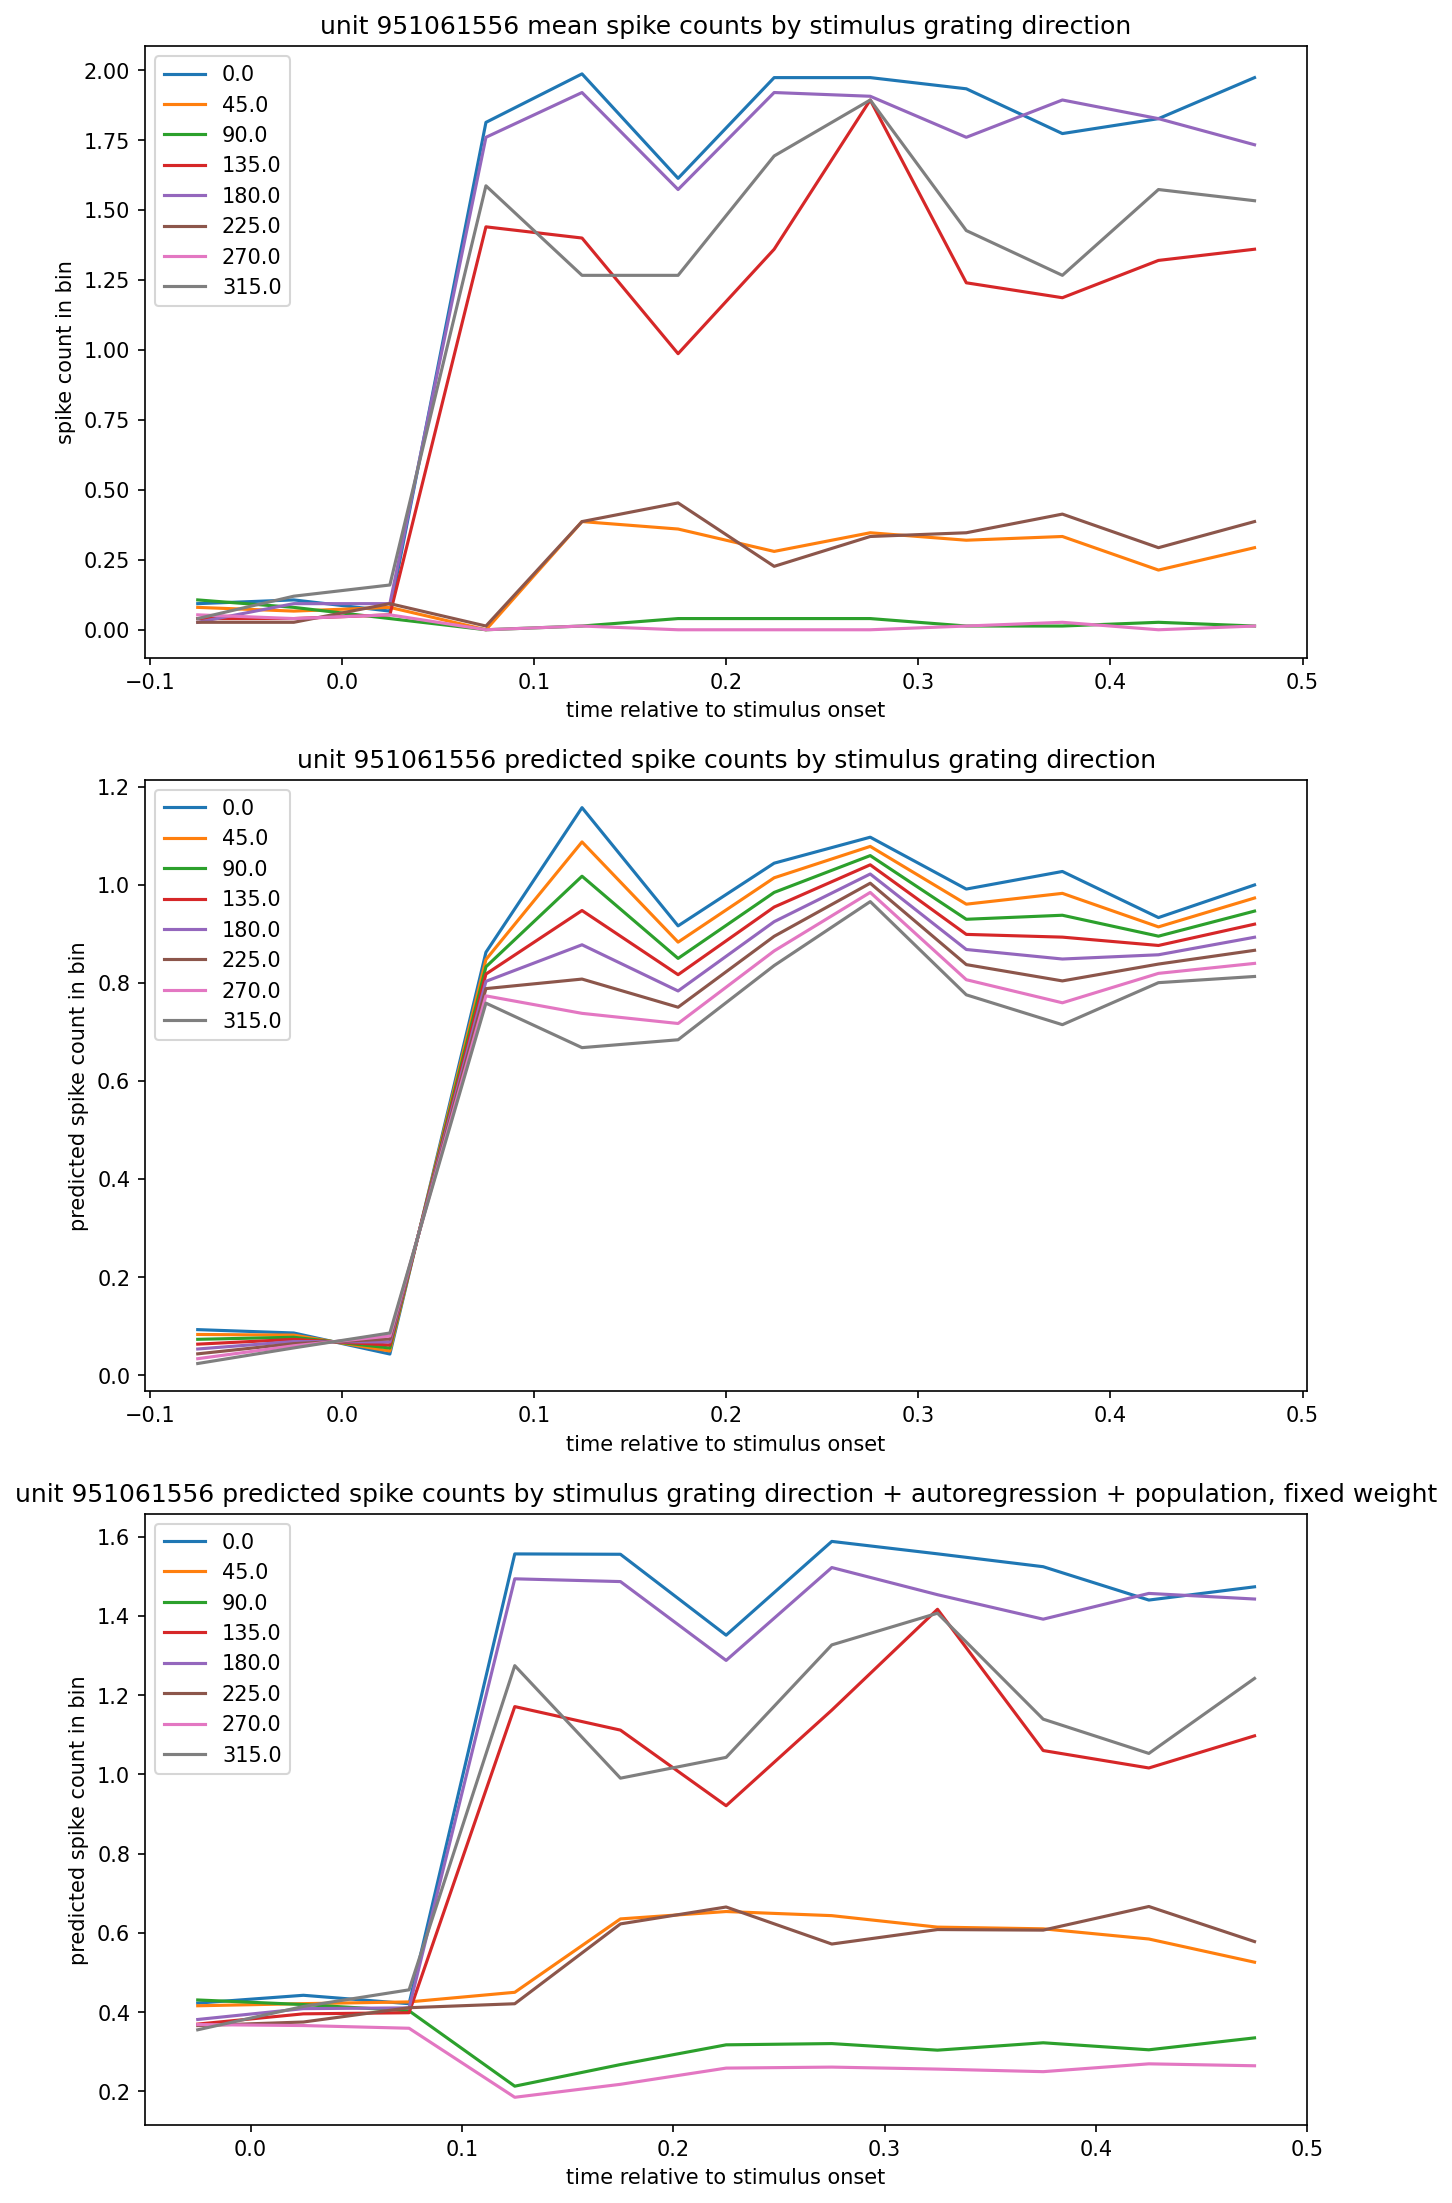

In [23]:
# plot regression result
unique_orientations.sort()

fig, ax = plt.subplots(3, 1, figsize=(10, 18), dpi=150)

unit_id = 951061556
for orientation in unique_orientations: 
    trial_ids = presentations[presentations.orientation == orientation].index.values        
    data = histograms.loc[trial_ids, :, unit_id]
    mean = data.mean(dim="stimulus_presentation_id")
    ax[0].plot(data["time_relative_to_stimulus_onset"], mean, label=orientation)
ax[0].legend()
ax[0].set_xlabel("time relative to stimulus onset")
ax[0].set_ylabel("spike count in bin")
ax[0].set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")


# stimulus-based regression
pred_responses = []
for res in lin_reg_results:
    pred_responses.append(res.predict(unique_orientations.reshape(-1,1)))
pred_responses = np.array(pred_responses)

for i, orientation in enumerate(unique_orientations):
    ax[1].plot(data["time_relative_to_stimulus_onset"], pred_responses[:, i], label=orientation)
ax[1].legend()
ax[1].set_xlabel("time relative to stimulus onset")
ax[1].set_ylabel("predicted spike count in bin")
ax[1].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction")

# plot auto regressive model means
pred_mean_responses = np.empty((len(unique_orientations), spikes_train.shape[1]-1))
for i in range(spikes_train.shape[1]-1):
    time_bin_idx = i + 1
    for j, orientation in enumerate(unique_orientations):
        trial_ids = presentations[presentations.orientation == orientation].index.values     
        orientations = np.repeat(orientation, len(trial_ids))
        data = histograms.loc[trial_ids, :, interesting_units]
        # X = np.stack([unique_orientations, pred_responses[-1]]).T
        X = get_X_auto_reg_population(data, orientations, time_bin_idx)
        Y = reg.predict(X)
        pred_mean_responses[j, i] = np.mean(Y)

for j, orientation in enumerate(unique_orientations):
    ax[2].plot(data["time_relative_to_stimulus_onset"][1:], pred_mean_responses[j, :], label=orientation)
ax[2].legend()
ax[2].set_xlabel("time relative to stimulus onset")
ax[2].set_ylabel("predicted spike count in bin")
ax[2].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction + autoregression + population, fixed weight")

## check influence from other neurons

In [29]:
print(f'target_unit: {target_unit_id}')
for i, unit in enumerate(interesting_units):
    print(f' unit {unit} coeff: {reg.coef_[0, i+1]}')


target_unit: 951061556
 unit 951061556 coeff: 0.5756899598723372
 unit 951061574 coeff: 0.005059117773624333
 unit 951061715 coeff: -0.059447431971149815
 unit 951061906 coeff: 0.07031319059286004
 unit 951061918 coeff: 0.05136750903213633
 unit 951061957 coeff: 0.1679648885438938
